
# Football

Load football network in GML format and compute some network statistics.

Shows how to download GML graph in a zipped file, unpack it, and load
into a NetworkX graph.

Requires Internet connection to download the URL
http://www-personal.umich.edu/~mejn/netdata/football.zip


In [41]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

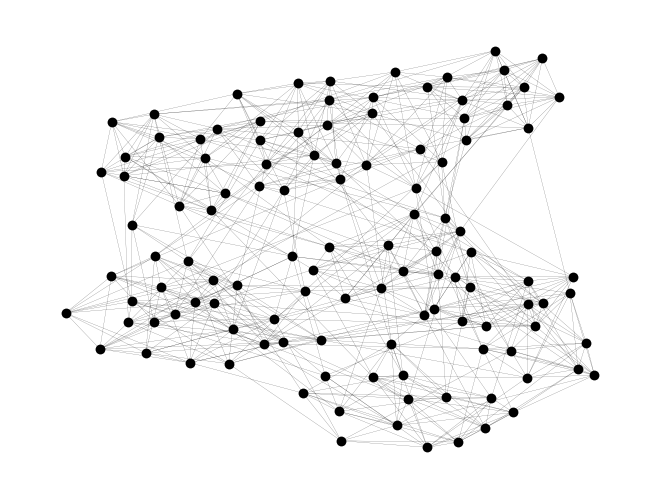

In [42]:


url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.savefig("grafo1.png", format="PNG")

plt.show()


# Medidas

In [43]:
# Degree Centrality => nro of connections

# Compute degree centrality
degree_centrality = nx.degree_centrality(G)

# Print the centrality values with two decimal places
formatted_closeness = {node: f'{centrality:.2f}' for node, centrality in degree_centrality.items()}
print("Degree Centrality:", formatted_closeness,)


Degree Centrality: {'BrighamYoung': '0.11', 'FloridaState': '0.11', 'Iowa': '0.11', 'KansasState': '0.11', 'NewMexico': '0.10', 'TexasTech': '0.11', 'PennState': '0.11', 'SouthernCalifornia': '0.11', 'ArizonaState': '0.10', 'SanDiegoState': '0.10', 'Baylor': '0.09', 'NorthTexas': '0.09', 'NorthernIllinois': '0.09', 'Northwestern': '0.10', 'WesternMichigan': '0.09', 'Wisconsin': '0.11', 'Wyoming': '0.10', 'Auburn': '0.10', 'Akron': '0.10', 'VirginiaTech': '0.10', 'Alabama': '0.10', 'UCLA': '0.10', 'Arizona': '0.10', 'Utah': '0.10', 'ArkansasState': '0.09', 'NorthCarolinaState': '0.10', 'BallState': '0.09', 'Florida': '0.10', 'BoiseState': '0.08', 'BostonCollege': '0.10', 'WestVirginia': '0.10', 'BowlingGreenState': '0.10', 'Michigan': '0.10', 'Virginia': '0.09', 'Buffalo': '0.10', 'Syracuse': '0.10', 'CentralFlorida': '0.07', 'GeorgiaTech': '0.10', 'CentralMichigan': '0.10', 'Purdue': '0.10', 'Colorado': '0.10', 'ColoradoState': '0.09', 'Connecticut': '0.06', 'EasternMichigan': '0.10', 

In [44]:
print(max(degree_centrality))
print(min(degree_centrality))
print((degree_centrality))

Wyoming
AirForce
{'BrighamYoung': 0.10526315789473684, 'FloridaState': 0.10526315789473684, 'Iowa': 0.10526315789473684, 'KansasState': 0.10526315789473684, 'NewMexico': 0.09649122807017543, 'TexasTech': 0.10526315789473684, 'PennState': 0.10526315789473684, 'SouthernCalifornia': 0.10526315789473684, 'ArizonaState': 0.09649122807017543, 'SanDiegoState': 0.09649122807017543, 'Baylor': 0.08771929824561403, 'NorthTexas': 0.08771929824561403, 'NorthernIllinois': 0.08771929824561403, 'Northwestern': 0.09649122807017543, 'WesternMichigan': 0.08771929824561403, 'Wisconsin': 0.10526315789473684, 'Wyoming': 0.09649122807017543, 'Auburn': 0.09649122807017543, 'Akron': 0.09649122807017543, 'VirginiaTech': 0.09649122807017543, 'Alabama': 0.09649122807017543, 'UCLA': 0.09649122807017543, 'Arizona': 0.09649122807017543, 'Utah': 0.09649122807017543, 'ArkansasState': 0.08771929824561403, 'NorthCarolinaState': 0.09649122807017543, 'BallState': 0.08771929824561403, 'Florida': 0.09649122807017543, 'Boise

In [45]:
print(nx.average_shortest_path_length(G))

2.5081617086193746


In [46]:
nx.betweenness_centrality(G)

{'BrighamYoung': 0.03248994918389482,
 'FloridaState': 0.017621112680095283,
 'Iowa': 0.013122497053431072,
 'KansasState': 0.023070098856845606,
 'NewMexico': 0.010663869449409077,
 'TexasTech': 0.010660982082613544,
 'PennState': 0.01968128436895882,
 'SouthernCalifornia': 0.014563035979091633,
 'ArizonaState': 0.005008648931669307,
 'SanDiegoState': 0.01183115085985048,
 'Baylor': 0.006907991485590174,
 'NorthTexas': 0.011400348520391542,
 'NorthernIllinois': 0.010144133783987277,
 'Northwestern': 0.017291363429954684,
 'WesternMichigan': 0.007074447857815538,
 'Wisconsin': 0.020895265847707085,
 'Wyoming': 0.022213447427560148,
 'Auburn': 0.01660199660390932,
 'Akron': 0.008492946116024448,
 'VirginiaTech': 0.009759312735771708,
 'Alabama': 0.02304632173060802,
 'UCLA': 0.022126807176414888,
 'Arizona': 0.006732525804006757,
 'Utah': 0.0075893356814986665,
 'ArkansasState': 0.02070022463158684,
 'NorthCarolinaState': 0.01778327242869339,
 'BallState': 0.01700336998667973,
 'Florida

In [47]:
nx.all_pairs_shortest_path(G)

<generator object all_pairs_shortest_path at 0x7f8540be3190>

# Visualizações com base nas medidas

Betweenness Centrality: {'BrighamYoung': '0.03', 'FloridaState': '0.02', 'Iowa': '0.01', 'KansasState': '0.02', 'NewMexico': '0.01', 'TexasTech': '0.01', 'PennState': '0.02', 'SouthernCalifornia': '0.01', 'ArizonaState': '0.01', 'SanDiegoState': '0.01', 'Baylor': '0.01', 'NorthTexas': '0.01', 'NorthernIllinois': '0.01', 'Northwestern': '0.02', 'WesternMichigan': '0.01', 'Wisconsin': '0.02', 'Wyoming': '0.02', 'Auburn': '0.02', 'Akron': '0.01', 'VirginiaTech': '0.01', 'Alabama': '0.02', 'UCLA': '0.02', 'Arizona': '0.01', 'Utah': '0.01', 'ArkansasState': '0.02', 'NorthCarolinaState': '0.02', 'BallState': '0.02', 'Florida': '0.01', 'BoiseState': '0.02', 'BostonCollege': '0.01', 'WestVirginia': '0.02', 'BowlingGreenState': '0.01', 'Michigan': '0.01', 'Virginia': '0.01', 'Buffalo': '0.01', 'Syracuse': '0.02', 'CentralFlorida': '0.01', 'GeorgiaTech': '0.01', 'CentralMichigan': '0.03', 'Purdue': '0.01', 'Colorado': '0.01', 'ColoradoState': '0.01', 'Connecticut': '0.01', 'EasternMichigan': '0.

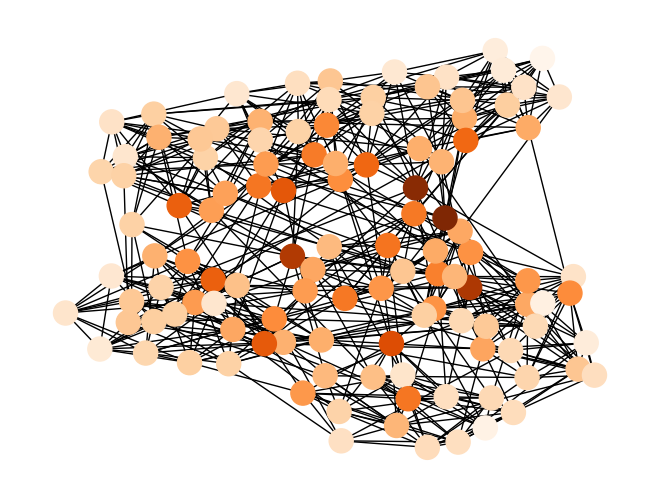

In [48]:
# Compute betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Print the centrality values
formatted_betweenness = {node: f'{centrality:.2f}' for node, centrality in betweenness_centrality.items()}
print("Betweenness Centrality:", formatted_betweenness)

# Draw the graph
nx.draw(G=G, 
        pos=pos, 
        with_labels=False, 
        node_color=list(betweenness_centrality.values()), 
        cmap=plt.cm.Oranges)
plt.show()

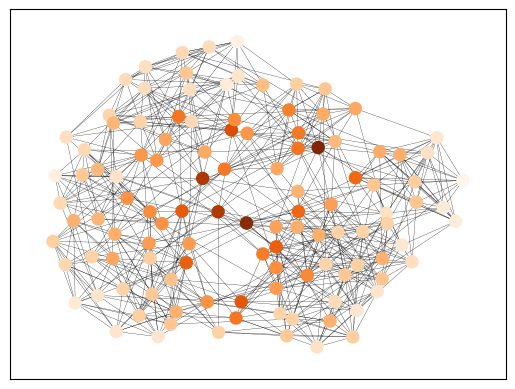

In [49]:
pos = nx.kamada_kawai_layout(G)

nx.draw_networkx(G=G, 
        pos=pos, 
        node_size=75,
        width =0.2,
        with_labels=False,
        font_size=5, 
        node_color=list(betweenness_centrality.values()), 
        cmap=plt.cm.Oranges)
plt.savefig("betweenness_centrality_colors.png", format="PNG")
plt.show()


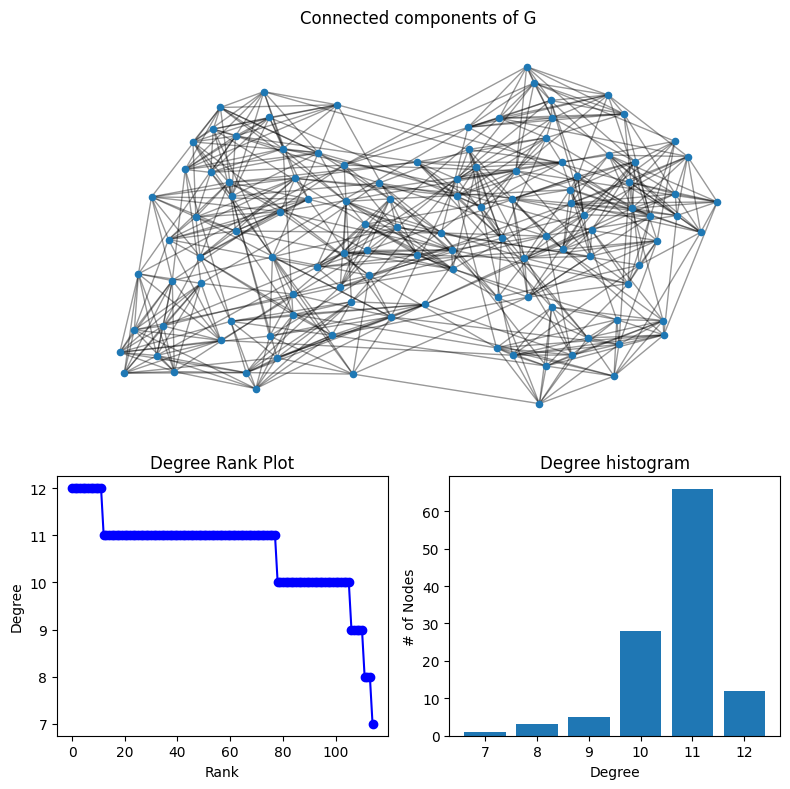

In [50]:

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig("degree_analysis.png", format="PNG")
plt.show()

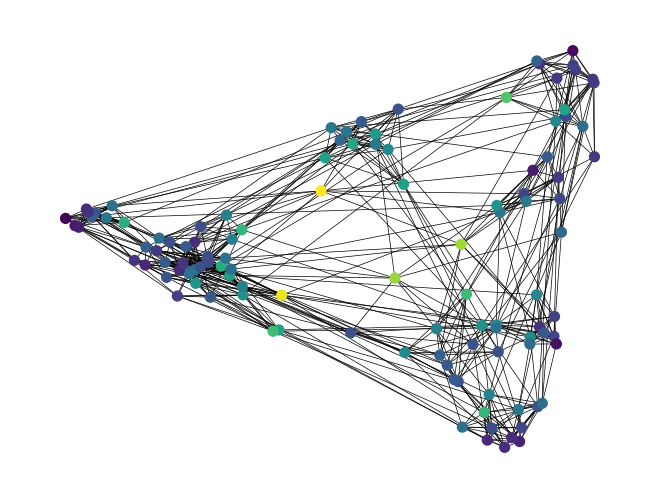

In [51]:
options = {"node_color": list(betweenness_centrality.values()), 
         "node_size": 50,"width":0.5}
nx.draw_spectral(G, **options)

plt.show()

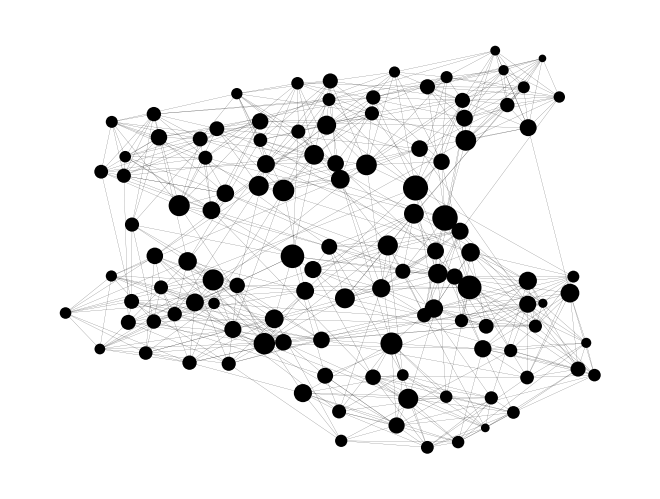

In [52]:

options = {
    "node_color": "black",
    "node_size": [v * 10000 for v in betweenness_centrality.values()], 
    "linewidths": 0, 
    "width": 0.1
    }

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.savefig("betweenness_centrality_node_size.png", format="PNG")
plt.show()

In [53]:
communities = nx.community.greedy_modularity_communities(G)


In [54]:
# Compute positions for the node clusters as if they were themselves nodes in a
# supergraph using a larger scale factor
supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(G, scale=10, seed=1969)


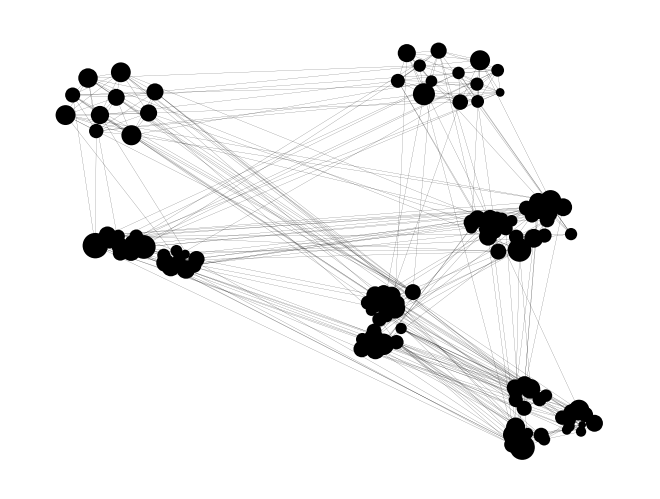

In [55]:



# Use the "supernode" positions as the center of each node cluster
centers = list(superpos.values())
pos = {}
for center, comm in zip(centers, communities):
    pos.update(nx.spring_layout(nx.subgraph(G, comm), center=center, seed=1430))


nx.draw(G, pos, **options)
plt.savefig("greedy_community.png", format="PNG")
plt.show()

/tmp/ipykernel_84874/653116309.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, i)


<Figure size 640x480 with 0 Axes>

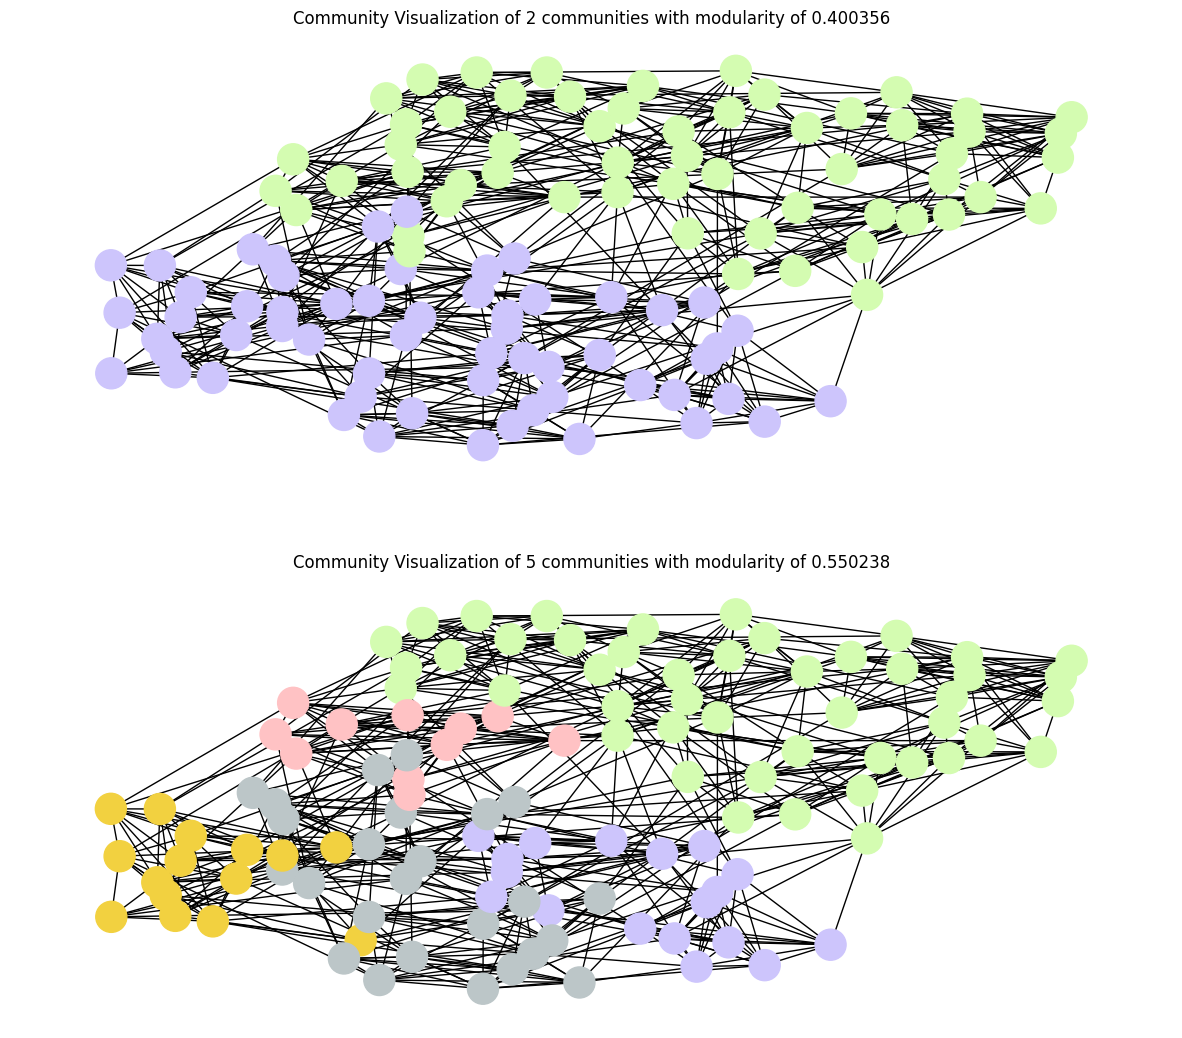

In [60]:


# Load graph and find communities using Girvan-Newman
communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities)
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors


# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=500,
        node_color=node_colors,
        with_labels=False,
        font_size=20,
        font_color="black",
    )




plt.savefig("community_modularity.png", format="PNG")
fig, ax = plt.subplots(2, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)





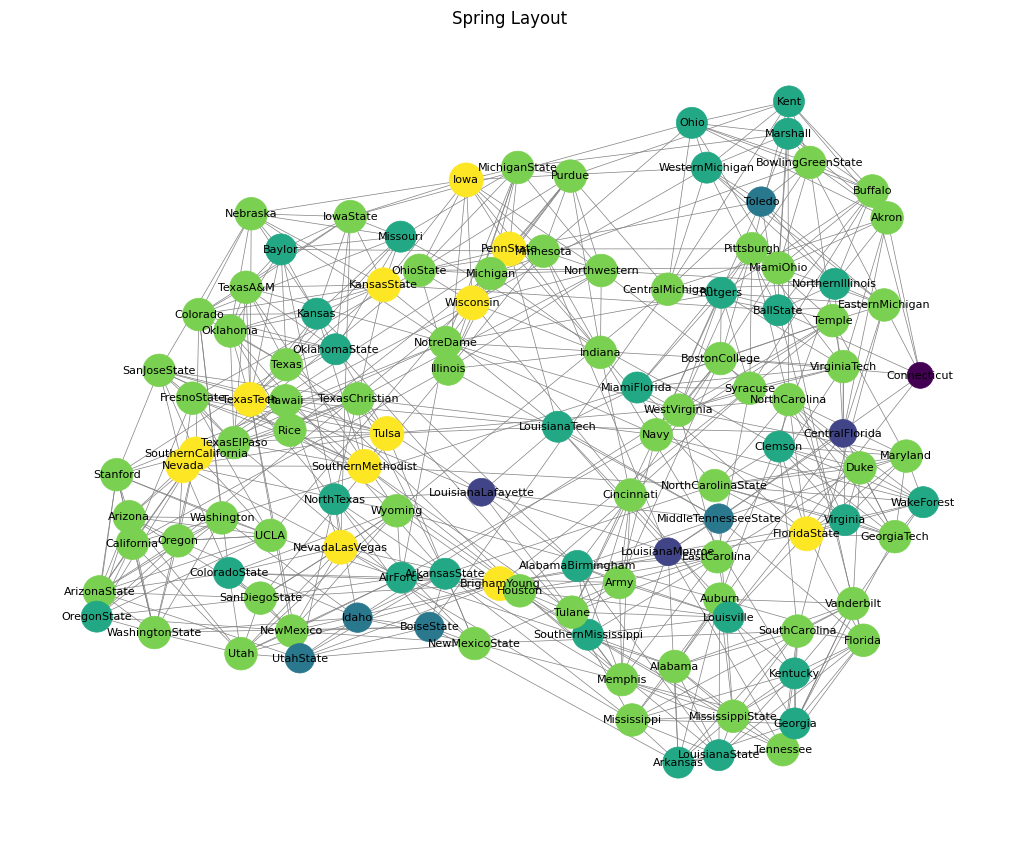

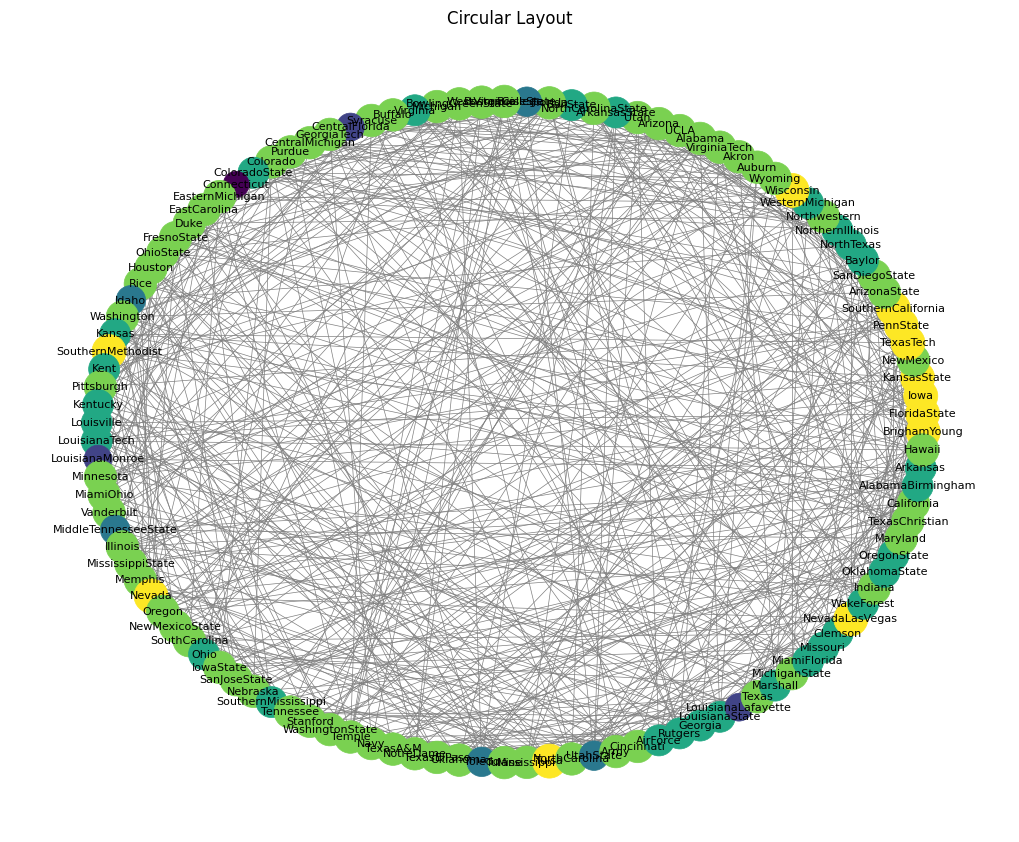

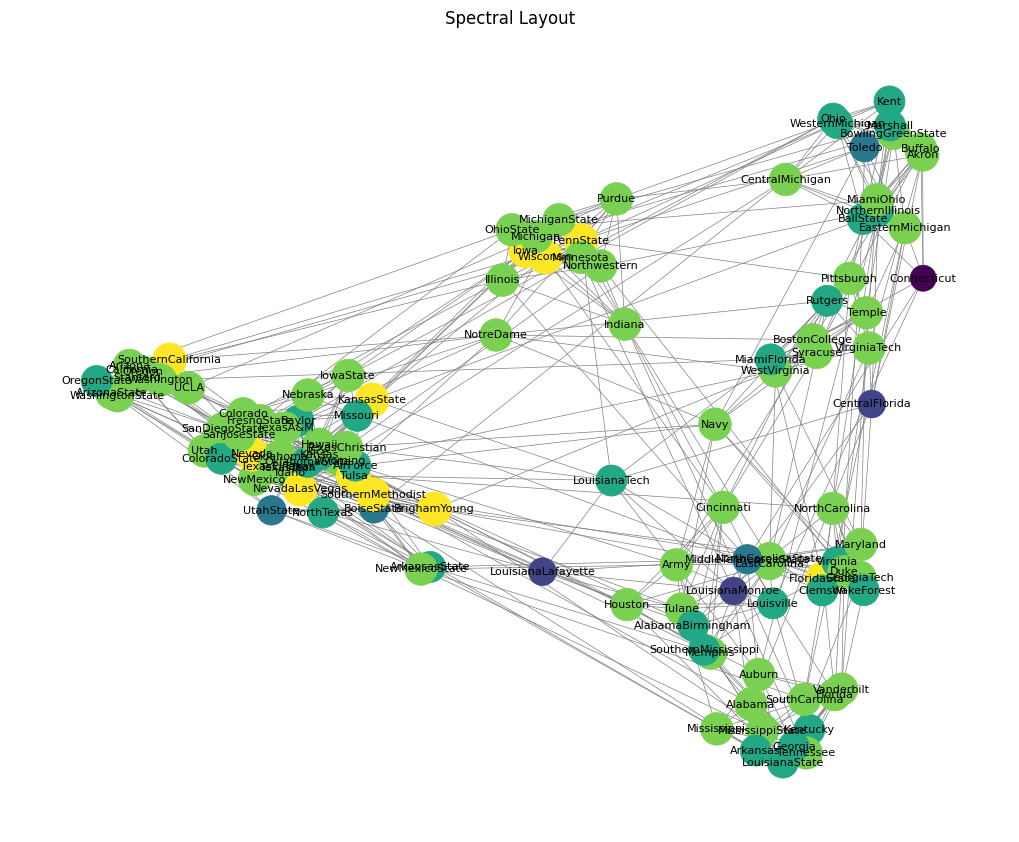

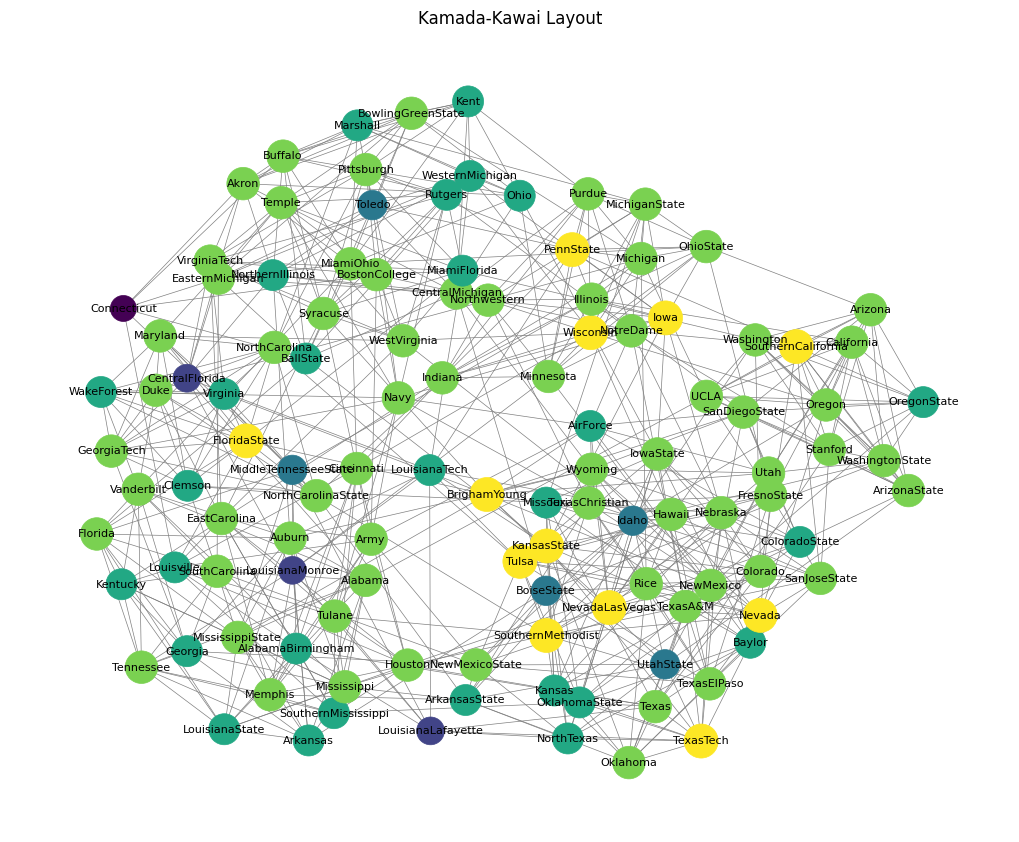

In [63]:


# Função para plotar grafos com diferentes layouts
def plot_graph(G, layout, title):
    plt.figure(figsize=(10, 8))
    pos = layout(G)
    degrees = dict(G.degree())
    nx.draw(
        G,
        pos,
        node_color=list(degrees.values()),
        node_size=[v * 50 for v in degrees.values()],
        cmap=plt.cm.viridis,
        with_labels=True,
        font_size=8,
        edge_color='gray',
        linewidths=0.5,
        width=0.5,
    )
    plt.title(title)
    plt.savefig("layout.png", format="PNG")

    plt.show()

layouts = {
    "Spring Layout": nx.spring_layout,
    "Circular Layout": nx.circular_layout,
    "Spectral Layout": nx.spectral_layout,
    "Kamada-Kawai Layout": nx.kamada_kawai_layout,
}

# Plotando diferentes layouts
for title, layout in layouts.items():
    plot_graph(G, layout, title)
